# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/gonca/OneDrive/Documentos/GitHub/lab-problems-in-ml/data/boston_data.csv')

In [3]:
data.shape

(404, 14)

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [5]:
data.dtypes 
# all floats which is what we want since it is numerical data!

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [6]:
data.describe()
# to get an overview of the data at hand

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [7]:
data.isna().sum()
# we don't have missing values so we're good to check the outliers

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [8]:
# checking for outliers:

def outliers(df, col):
    
    '''
    This function will receive a dataframe
    calculate the IQR
    return only the rows that are not outliers 
    '''
    
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    upper = df[col].quantile(0.75) + IQR * 1.5
    lower = df[col].quantile(0.25) - IQR * 1.5
    
    data_filtered = df[(df[col] < upper) & (df[col] > lower)]
    return data_filtered


In [9]:
for column in data.columns:
    data_filtered = outliers(data, column)

In [10]:
data_filtered
# this new dataframe is a dataframe with no outliers!

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

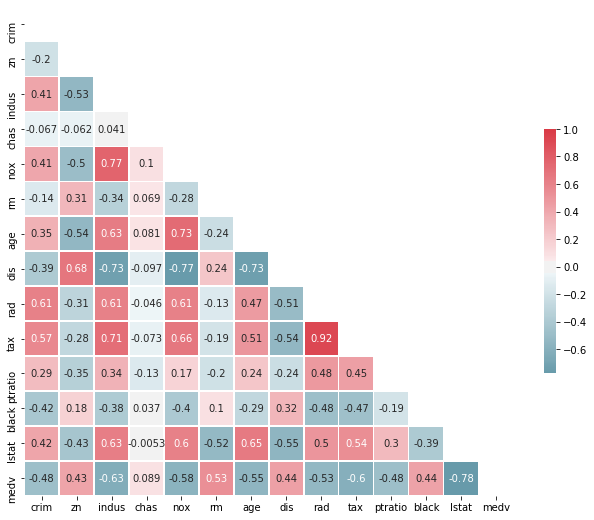

In [11]:
corr = data_filtered.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

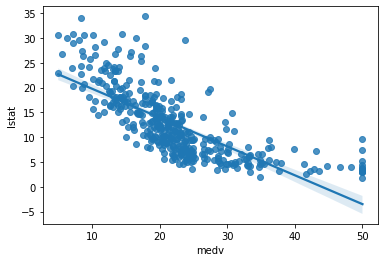

In [12]:
sns.regplot(data['medv'],data['lstat'])

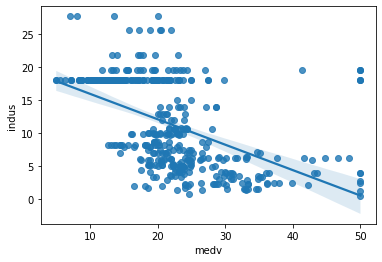

In [13]:
sns.regplot(data['medv'],data['indus'])

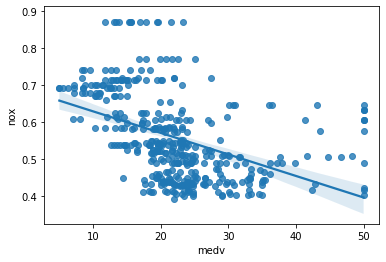

In [14]:
sns.regplot(data['medv'],data['nox'])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [15]:
# I guess so, but I don't really know what they mean...

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [16]:
# I already did above and there are a few one we could go for like the 'rad', 'rm', 'age', etc

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [17]:
data_filtered['medv'].describe()

count    377.000000
mean      20.841379
std        6.449545
min        5.600000
25%       16.600000
50%       20.900000
75%       24.200000
max       36.500000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [18]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [19]:
from sklearn.model_selection import train_test_split

x = data_filtered.drop(['medv'], axis = 1)
y = data_filtered['medv']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2, shuffle = True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [20]:
from sklearn.ensemble import RandomForestRegressor 

In [21]:
from sklearn.ensemble import RandomForestRegressor 

def max(depth):

    regressor = RandomForestRegressor(max_depth = depth, random_state=0)
    model = regressor.fit(x,y)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print('train accuracy', r2_score(y_train, y_train_pred))
    print('test accuracy', r2_score(y_test, y_test_pred))
    print('------------------------------------')
    #plt.plot(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

In [22]:
list_depth = [2,4,6,8,10]

for i in list_depth:
    max(i)

train accuracy 0.7359011360116288
test accuracy 0.7826084305812867
------------------------------------
train accuracy 0.8725395363181917
test accuracy 0.9162593304785205
------------------------------------
train accuracy 0.9341659820744418
test accuracy 0.9633169864842934
------------------------------------
train accuracy 0.9594532859037662
test accuracy 0.9790392185222201
------------------------------------
train accuracy 0.9679398399554952
test accuracy 0.9833269843114489
------------------------------------


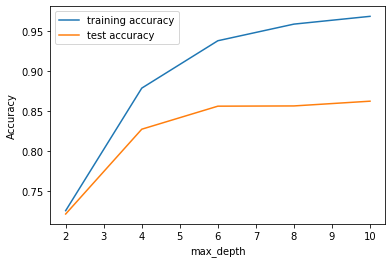

In [24]:
training_accuracy = []
test_accuracy = []
max_depth = range(2, 11,2)
for depth in max_depth:
    model = RandomForestRegressor(max_depth=depth)
    model.fit(x_train, y_train)
    training_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))
plt.plot(max_depth, training_accuracy, label="training accuracy")
plt.plot(max_depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Now, plot the score for each tree on the training set and on the testing set.

In [ ]:
# did in the one above!!

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# It shows that the higher the depth, the more accuracy I'll get! Just need to be careful not to overfit

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [137]:
# for max depth of 1

def depth(maximum_depth):

    x = data_filtered.drop(['medv'], axis = 1)
    y = data_filtered['medv']

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2, shuffle = True)

    regressor = RandomForestRegressor(max_depth = maximum_depth, random_state=0)
    model = regressor.fit(x,y)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    return r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)
    
print(depth(1))
print('--------------------------------------')
print(depth(10))

(0.5419253480820578, 0.4828712333843481)
--------------------------------------
(0.9679398399554952, 0.9833269843114489)


In [138]:
# high bias is how much the predicted values differ from the true values. So in this case we have a higher bias when the depth is 1
# with 10 doesn't suffer that much!

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [144]:
for i in range(1,20):
    print('with max_depth of', i, max(i))
    
# from the max_depth = 9 it became almost stable so this one should be the one used!


train accuracy 0.5419253480820578
test accuracy 0.4828712333843481
------------------------------------
with max_depth of 1 None
train accuracy 0.7359011360116288
test accuracy 0.7826084305812867
------------------------------------
with max_depth of 2 None
train accuracy 0.8170447231067381
test accuracy 0.8670953833125329
------------------------------------
with max_depth of 3 None
train accuracy 0.8725395363181917
test accuracy 0.9162593304785205
------------------------------------
with max_depth of 4 None
train accuracy 0.907057899192548
test accuracy 0.9455890146793025
------------------------------------
with max_depth of 5 None
train accuracy 0.9341659820744418
test accuracy 0.9633169864842934
------------------------------------
with max_depth of 6 None
train accuracy 0.949956578897718
test accuracy 0.9751156894502828
------------------------------------
with max_depth of 7 None
train accuracy 0.9594532859037662
test accuracy 0.9790392185222201
--------------------------------

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# 1- well the data is definetely too old to predict for today.

# 2- I think they are enough. Of course we can always go more into detail but the one present are okk

# 3- Not that much because we could only apply it for that time period and in Boston. It is not robust enough to generalize to
# portugal for example

# 4 - Definetely not! 